

1. Обучить, нейронную сеть на Keras на датасете MNIST.

In [ ]:
# !pip install scikeras[tensorflow] # уже установлен

In [ ]:
# !pip install mnist

In [ ]:
import numpy as np
import pandas as pd
import mnist
# import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from scikeras.wrappers import KerasClassifier

### Building model for digit recognition

In [ ]:
#import images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

(-0.5, 27.5, 27.5, -0.5)

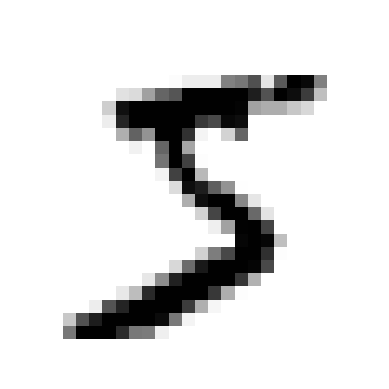

In [ ]:
# Выведем на экран изображение
plt.imshow(train_images[0], cmap='binary')
plt.axis('off')

In [ ]:
test_labels = mnist.test_labels()

# Нормализуем пиксели изображения
# все значения делим на 255, приводим к единому масштабу
train_images = (train_images / 255)
test_images = (test_images / 255)

# Предобработка в одномерный массив
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [ ]:
print(len(train_images), len(train_labels), len(test_images), len(test_labels))

60000 60000 10000 10000


In [ ]:
# Строим модель
def create_model(optimizer='adam'):
    model = Sequential([
        Dense(64, input_shape=(784,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    return model

In [ ]:
to_categorical(train_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# import matplotlib.pyplot as plt
# plt.imshow(mnist.train_images()[0]/255)
# mnist.train_images()[0]/255
# to_categorical(train_labels)
# #train_labels

Создаем модель и смотрим ее параметры <br>
param - количество параметров ,которые задает каждый слой

In [ ]:
model_1 = create_model()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# обучение модели
model_1.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# оценка производительности
loss, metric = model_1.evaluate(test_images, to_categorical(test_labels))
print('**************************')
print(f'Loss - {np.round(loss, 2)}, Metrics - {np.round(metric, 3)}')

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.9191
Epoch 2/5
   1/1875 [..............................] - ETA: 5s - loss: 0.0855 - accuracy: 0.9688

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1303 - accuracy: 0.9607
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0935 - accuracy: 0.9710
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.9765
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9714
**************************
Loss - 0.09, Metrics - 0.971


Точность модели 97%

In [ ]:
# используем модель на тестовых данных
predictions = model_1.predict(test_images[:10])

1/1 [==============================] - 0s 145ms/step


In [ ]:
# выведем предсказанные значения
print(f'Predictions: {np.argmax(predictions, axis=1)}')

Predictions: [7 2 1 0 4 1 4 9 6 9]


In [ ]:
# правильные ответы
print(f'True labels: {test_labels[:10]}')

True labels: [7 2 1 0 4 1 4 9 5 9]


GridSearchCV

In [ ]:
batch_size = [500,1000]
epochs = [5, 10]
optimizer = ['SGD', 'RMSprop', 'Adam']

In [ ]:
model = KerasClassifier(create_model)
params = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/5


80/80 [==============================] - 1s 5ms/step - loss: 0.9829 - accuracy: 0.7376
Epoch 2/5
80/80 [==============================] - 0s 5ms/step - loss: 0.3062 - accuracy: 0.9142
Epoch 3/5
80/80 [==============================] - 1s 7ms/step - loss: 0.2318 - accuracy: 0.9345
Epoch 4/5
80/80 [==============================] - 0s 5ms/step - loss: 0.1928 - accuracy: 0.9454
Epoch 5/5
40/40 [==============================] - 0s 3ms/step
Epoch 1/5
80/80 [==============================] - 1s 5ms/step - loss: 0.8892 - accuracy: 0.7469
Epoch 2/5
80/80 [==============================] - 0s 5ms/step - loss: 0.2915 - accuracy: 0.9178
Epoch 3/5
80/80 [==============================] - 0s 5ms/step - loss: 0.2255 - accuracy: 0.9355
Epoch 4/5
80/80 [==============================] - 0s 5ms/step - loss: 0.1930 - accuracy: 0.9457
Epoch 5/5
40/40 [==============================] - 0s 3ms/step
Epoch 1/5
80/80 [==============================] - 1s 5ms/step - loss: 0.9751 - accuracy: 0.7335
Epoch 2/5
8

In [ ]:
df = pd.DataFrame(grid_result.cv_results_)

In [ ]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size', 'param_epochs', 'param_optimizer', 'mean_test_score']].head(10)


,param_batch_size,param_epochs,param_optimizer,mean_test_score
4,500,10,RMSprop,0.958050
5,500,10,Adam,0.957217
3,500,10,SGD,0.956800
10,1000,10,RMSprop,0.949450
9,1000,10,SGD,0.949050
11,1000,10,Adam,0.947183
0,500,5,SGD,0.946083
1,500,5,RMSprop,0.945050
2,500,5,Adam,0.943683
7,1000,5,RMSprop,0.931817


In [ ]:
exit()

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


NameError: name 'keras' is not defined

: 

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:
model_2 = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(90, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [ ]:
model_2.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=500, epochs=10)

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [ ]:
model_2.evaluate(x_test, y_test_cat)

In [ ]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
n_rec=35
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("1:", prediction)

In [ ]:
# Build the model.
def create_model(optimizer='adam'):
    model = Sequential([
      Dense(64, input_shape=(784,), activation='relu'),
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [ ]:
model = create_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

In [ ]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:10]}')

#ДОМАШНЕЕ ЗАДАНИЕ


In [ ]:
# меняю оптимизатор, добавляю слой с увеличенным числом нейронов

In [ ]:

def my_model(optimizer='RMSprop'):
    model = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [ ]:
dz_model = my_model()
dz_model.summary()

In [ ]:
to_categorical(test_labels)

In [ ]:

dz_model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model.
loss,metrics = dz_model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

In [ ]:
model_2 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

In [ ]:
model_3 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=7, batch_size=128, validation_split=0.2)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

In [ ]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:20])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:20]}')

In [ ]:
batch_size = [70, 80, 90]
epochs = [18, 25]
optimizer = ['RMSprop', 'Adam']

In [ ]:
model = KerasClassifier(my_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

In [ ]:
print(grid_result.best_score_, grid_result.best_params_)

In [ ]:
df = pd.DataFrame(grid_result.cv_results_)

In [ ]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

# Вывод:
1 Введение дополнительного скрытого слоя улучшает показатель метрики.   
2 Умеренное увеличение количества эпох улучшает показатель метрики.   
3 Умеренное увеличение batch_size ускоряет обучение.      
4 Наличие валидационной выборки препятствует переобучению.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')